In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


add libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns # for statistical data visualization
%matplotlib inline


Data Y=TARGET X=matrix features using nonbinary

In [4]:
bo_df=pd.read_csv("Cyber_SVM1.csv")

In [5]:
bo_df.head(5)

,Salary_low,Salary_med,Salary_upper,Work_env,Buy_rent,Commute,Weekly_commute,Person_crime,Prop_crime,Experience_level,TARGET
0,55000.0,67500.0,80000,1,0,0,0,1,3,1,0
1,84500.0,95750.0,107000,1,0,0,0,4,5,2,1
2,75000.0,82500.0,90000,1,0,0,0,5,4,1,0
3,55700.0,63150.0,70600,1,0,0,0,1,3,1,0
4,120000.0,140000.0,160000,1,1,0,0,1,3,3,0


In [6]:
bo_df.shape

(1218, 11)

In [7]:
col_names = bo_df.columns 
col_names

Index(['Salary_low', 'Salary_med', 'Salary_upper', 'Work_env', 'Buy_rent',
       'Commute', 'Weekly_commute', 'Person_crime', 'Prop_crime',
       'Experience_level', 'TARGET'],
      dtype='object')

In [8]:
bo_df.TARGET.value_counts()

0    917
1    301
Name: TARGET, dtype: int64

In [10]:
bo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Salary_low        1218 non-null   float64
 1   Salary_med        1218 non-null   float64
 2   Salary_upper      1218 non-null   int64  
 3   Work_env          1218 non-null   int64  
 4   Buy_rent          1218 non-null   int64  
 5   Commute           1218 non-null   int64  
 6   Weekly_commute    1218 non-null   int64  
 7   Person_crime      1218 non-null   int64  
 8   Prop_crime        1218 non-null   int64  
 9   Experience_level  1218 non-null   int64  
 10  TARGET            1218 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 104.8 KB


check for null values

In [11]:
bo_df.isnull().sum()

Salary_low          0
Salary_med          0
Salary_upper        0
Work_env            0
Buy_rent            0
Commute             0
Weekly_commute      0
Person_crime        0
Prop_crime          0
Experience_level    0
TARGET              0
dtype: int64

creat matrices

In [27]:
X=bo_df.drop(['TARGET'], axis=1)

In [28]:
y=bo_df['TARGET']

In [29]:
y.head(5)

0    0
1    1
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [31]:
X_train.head(5)

,Salary_low,Salary_med,Salary_upper,Work_env,Buy_rent,Commute,Weekly_commute,Person_crime,Prop_crime,Experience_level
231,120000.0,140000.0,160000,1,1,0,0,1,3,3
173,75000.0,82500.0,90000,1,0,0,0,5,4,1
195,54000.0,59400.0,64800,3,0,100,700,1,3,1
746,94000.0,113000.0,132000,3,0,36,252,3,1,2
1163,130000.0,135000.0,140000,3,0,56,392,3,1,3


In [32]:
X_train.columns

Index(['Salary_low', 'Salary_med', 'Salary_upper', 'Work_env', 'Buy_rent',
       'Commute', 'Weekly_commute', 'Person_crime', 'Prop_crime',
       'Experience_level'],
      dtype='object')

In [33]:
X_train.shape, X_test.shape

((974, 10), (244, 10))

In [34]:
cols = X_train.columns

In [20]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [21]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8073770491803278
Confusion Matrix:
[[172  12]
 [ 35  25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       184
           1       0.68      0.42      0.52        60

    accuracy                           0.81       244
   macro avg       0.75      0.68      0.70       244
weighted avg       0.79      0.81      0.79       244



preprocess with Standard Scaler

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [36]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [38]:
X_train.describe()

,Salary_low,Salary_med,Salary_upper,Work_env,Buy_rent,Commute,Weekly_commute,Person_crime,Prop_crime,Experience_level
count,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02
mean,6.383212e-18,3.209844e-16,-1.340475e-16,2.370907e-16,6.018457e-17,-5.106570e-17,3.647550e-17,5.836080e-17,-7.295100e-18,-2.279719e-16
std,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00
min,-1.631474e+00,-1.715652e+00,-1.855277e+00,-1.901755e+00,-8.277204e-01,-1.300959e+00,-1.300959e+00,-1.271061e+00,-1.724967e+00,-1.597755e+00
25%,-8.152233e-01,-7.691158e-01,-6.424023e-01,-6.552481e-01,-8.277204e-01,-1.084626e+00,-1.084626e+00,-1.271061e+00,-1.885080e-01,-4.214788e-01
50%,-2.384337e-01,-2.958476e-01,-1.525874e-01,5.912590e-01,-8.277204e-01,2.133715e-01,2.133715e-01,-1.404551e-01,-1.885080e-01,-4.214788e-01
75%,7.356522e-01,8.215910e-01,6.171217e-01,5.912590e-01,1.208137e+00,7.902595e-01,7.902595e-01,9.901503e-01,5.797213e-01,7.547973e-01
max,2.291969e+00,2.691000e+00,2.809626e+00,5.912590e-01,1.208137e+00,1.944035e+00,1.944035e+00,1.555453e+00,2.116180e+00,1.931074e+00


In [39]:
from sklearn.metrics import accuracy_score

In [40]:
svc=SVC() 

In [41]:
svc.fit(X_train,y_train)

SVC()

In [42]:
y_pred=svc.predict(X_test)

In [43]:
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9754


Running kernal = rbf

In [44]:
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)


SVC()

In [45]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9754098360655737
Confusion Matrix:
[[183   1]
 [  5  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       184
           1       0.98      0.92      0.95        60

    accuracy                           0.98       244
   macro avg       0.98      0.96      0.97       244
weighted avg       0.98      0.98      0.98       244



Different method of rbt C=1

Fit classifier to training set

Results

Same results

Salary ranges have outliers adjust  C (Regularization parameter) If margins  hard (no bleed),  use large value of C, if soft than small value of C

In [46]:
svm_model = SVC(kernel='rbf', C=100.)
svm_model.fit(X_train, y_train)

SVC(C=100.0)

In [47]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9959016393442623
Confusion Matrix:
[[183   1]
 [  0  60]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       184
           1       0.98      1.00      0.99        60

    accuracy                           1.00       244
   macro avg       0.99      1.00      0.99       244
weighted avg       1.00      1.00      1.00       244



In [48]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[183   1]
 [  0  60]]

True Positives(TP) =  183

True Negatives(TN) =  60

False Positives(FP) =  1

False Negatives(FN) =  0


# visualize confusion matrix with seaborn heatmap


<Axes: >

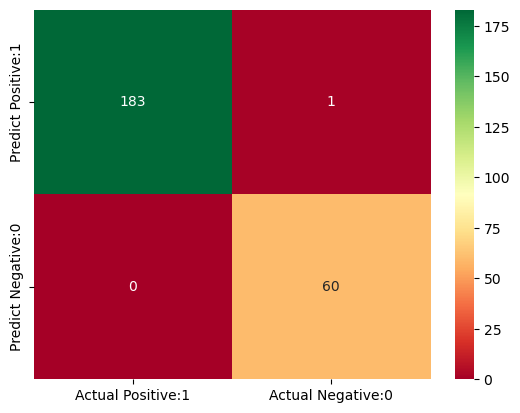

In [49]:


cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdYlGn')

Does increasing the C value make the fit better (SVM does not usually overfit)

In [ ]:
svm_model = SVC(kernel='rbf', C=1000.)
svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)


In [ ]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Linear after Standard Scaler has higher Accuracy Score.  

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Re run linear with higher C 

In [ ]:
svm_model = SVC(kernel='linear', C=100.)
svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Visualization

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdYlBu')

Classifcation error: 

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Precision Score

In [ ]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Plot ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
fpr

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2, label='Linear Regression(SVM) (Sensitivity =%0.3f)')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Cyber Burnout classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [51]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9973


In [53]:
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))



Cross validated ROC AUC : 0.9990


Stratified k-fold Cross Validation

In [54]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, shuffle=True, random_state=0)

linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)



In [55]:
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.73770492 0.70491803 0.79098361 0.74897119 0.81481481]


In [56]:
print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.7595
